Algerian Forest Dataset Link: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

`Dataset contains 2 other sub datasets`


In [3]:
import numpy as np
import pandas as pd
from fcmeans import FCM
import seaborn as sns
import skfuzzy
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from cvxopt import matrix, solvers

In [433]:
data = pd.read_csv("Algerian_forest_fires_dataset.csv", skiprows=1)
print(data.columns)
data.isnull().sum()


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [434]:
data.describe(include="all")

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244,244.000000,244.000000,244,243
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,NaN,NaN,127,8
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,0.4,fire
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,12,131
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,NaN,4.774180,16.664754,NaN,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,NaN,4.175318,14.204824,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,NaN,0.000000,1.100000,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,NaN,1.400000,6.000000,NaN,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,NaN,3.500000,12.250000,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,NaN,7.300000,22.525000,NaN,NaN


In [435]:
data.head(124)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [436]:
# Removing name and columns names of the second dataset
# data = data.drop(labels=122, axis=0)
# data = data.drop(labels=123, axis=0)


In [437]:
data = data.dropna()
print(data.isnull().sum())
data.shape


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64


(243, 14)

In [438]:
target = data["Classes  "]
data = data.drop(columns=["day","month", "year", "Classes  "])

In [439]:
print("Before: ", target.unique())
target = target.str.replace("  ", "")
target = target.str.replace(" ", "")
print("After: ", target.unique())

Before:  ['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']
After:  ['notfire' 'fire']


<AxesSubplot: >

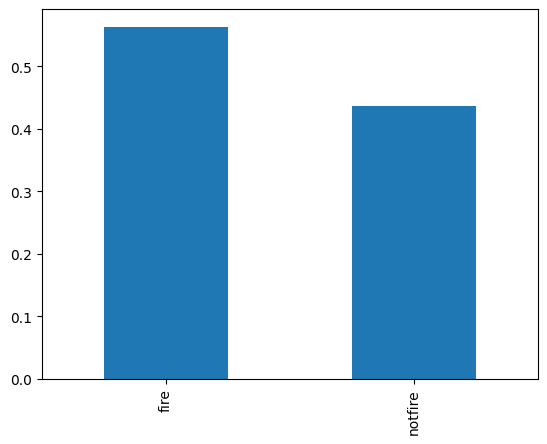

In [440]:
(target.value_counts()/len(target)).plot.bar()

In [441]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [442]:
X = data.to_numpy()
X = X.astype("float")
X

array([[29. , 57. , 18. , ...,  1.3,  3.4,  0.5],
       [29. , 61. , 13. , ...,  1. ,  3.9,  0.4],
       [26. , 82. , 22. , ...,  0.3,  2.7,  0.1],
       ...,
       [27. , 87. , 29. , ...,  0.4,  3.4,  0.2],
       [24. , 54. , 18. , ...,  1.7,  5.1,  0.7],
       [24. , 64. , 15. , ...,  1.2,  4.8,  0.5]])

In [443]:
scaledX = MinMaxScaler().fit_transform(X)


In [444]:
# Mapping Target
target = (target == "fire").astype(int)
y = target.to_numpy()

In [445]:
# c =2

fcm = FCM(n_clusters=2, m=4,random_state=20)
fcm.fit(scaledX)
fcm_centers = fcm.centers
fcm_labels = fcm.soft_predict(scaledX)

In [446]:
print("Centers: ", fcm_centers)
print("Labels: ", fcm_labels)


Centers:  [[0.43544961 0.67344598 0.41369059 0.0604074  0.63951166 0.11826515
  0.09710049 0.13492502 0.12563145 0.0929369 ]
 [0.59771198 0.50371264 0.41091402 0.01799307 0.84483798 0.32617368
  0.32066956 0.38880255 0.35909781 0.38932787]]
Labels:  [[0.66609711 0.33390289]
 [0.68069837 0.31930163]
 [0.56298014 0.43701986]
 [0.58184731 0.41815269]
 [0.67111072 0.32888928]
 [0.68443377 0.31556623]
 [0.49038691 0.50961309]
 [0.55489074 0.44510926]
 [0.60830409 0.39169591]
 [0.64864618 0.35135382]
 [0.55543872 0.44456128]
 [0.54360646 0.45639354]
 [0.61381474 0.38618526]
 [0.6523128  0.3476872 ]
 [0.62945767 0.37054233]
 [0.59615371 0.40384629]
 [0.59934069 0.40065931]
 [0.65819369 0.34180631]
 [0.65738127 0.34261873]
 [0.67217169 0.32782831]
 [0.67464888 0.32535112]
 [0.71398474 0.28601526]
 [0.62094123 0.37905877]
 [0.49755553 0.50244447]
 [0.44468031 0.55531969]
 [0.37606451 0.62393549]
 [0.28142058 0.71857942]
 [0.27867354 0.72132646]
 [0.47472575 0.52527425]
 [0.2665679  0.7334321 ]


In [447]:
cuts = skfuzzy.lambda_cut(fcm_labels, lcut=0.5)
# list(cuts[:,1]) == [ 1 if x > 0.5 else 0 for x in  list(model_labels[:,1])]
cuts = cuts[:, 1]

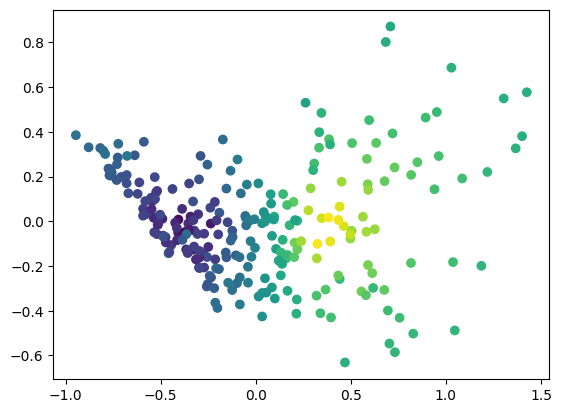

In [448]:
from sklearn.decomposition import PCA
"""
we are using PCA to reduce the data dimensionality so we can plot it in a 2-d graph 
"""
pca = PCA(n_components=2)

pca.fit(scaledX)

d2 = pca.transform(scaledX)

plt.scatter(d2[:, 0], d2[:, 1], c=fcm_labels[:, 1])
plt.show()

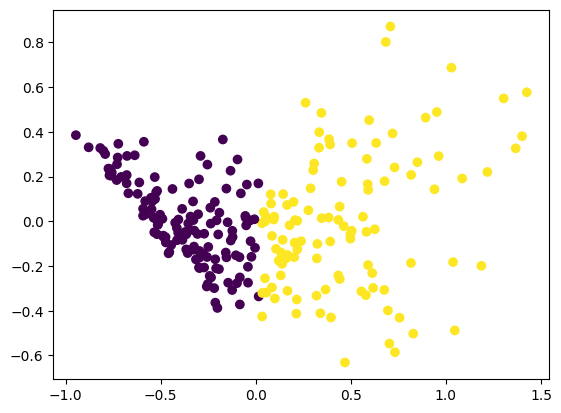

In [449]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(scaledX)

d2 = pca.transform(scaledX)

plt.scatter(d2[:, 0], d2[:, 1], c=cuts)

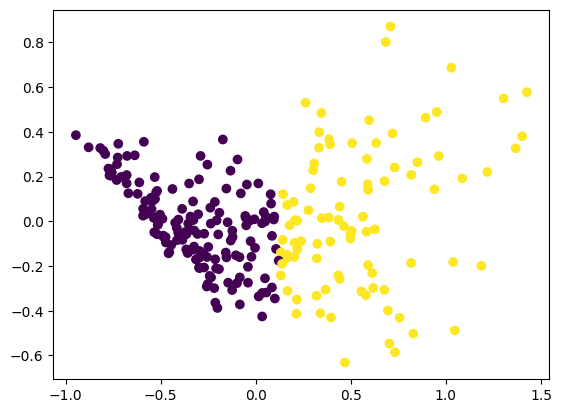

In [450]:
kmeans = KMeans(n_clusters=2,random_state=20)
# np.random.seed(20)
kmeans.fit(scaledX)
plt.scatter(d2[:, 0], d2[:, 1], c= kmeans.labels_ )
plt.show()


In [451]:
from sklearn.metrics import accuracy_score

print("Accuracy for FCM: ", accuracy_score(target, cuts))
print("Accuracy for KMeans: ", accuracy_score(target, kmeans.labels_))


Accuracy for FCM:  0.8353909465020576
Accuracy for KMeans:  0.7901234567901234


## Fuzzy SVM

Kernels

In [2]:
def linear(x,z):
    return np.dot(x,z.T)

def polynomial(x, z, p=5):
    return (1 + np.dot(x, z.T)) ** p


def gaussian(x, z, sigma=0.1):
    return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))

def euclidean(x,y):
    return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))


In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [ ]:
class FSVM(object):

    def __init__(self, kernel=gaussian_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X_train,X_test, y):
        self.kernel = gaussian_kernel
        n_samples, n_features = X_train.shape 
        nt_samples, nt_features = X_test.shape
        # Gram matrix

        print(self.K.shape)

        P = cvxopt.matrix(np.outer(y,y) * self.K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        A = matrix(A, (1,n_samples), 'd') #changes done
        b = cvxopt.matrix(0.0)
        #print(P,q,A,b)
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
            
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))
        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        print(solution['status'])
        # Lagrange multipliers
        a = np.ravel(solution['x'])
        a_org = np.ravel(solution['x'])
        # Support vectors have non zero lagrange multipliers
        for i in range(n_samples):
            sv=np.logical_or(self.a_org <self.m, self.a_org > 1e-5)
        #print(sv.shape)
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X_train[sv]
        self.sv_y = y[sv]
        #print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * self.K[ind[n],sv])
        self.b /= len(self.a)
        print(self.b)

        # Weight vector
        if self.kernel == gaussian_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else :
            self.w = None        
        
    def project(self, X):
        if self.w is None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            X=np.asarray(X)
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * gaussian_kernel(X[i], sv)
                y_predict[i] = s
              #  print(y_predict[i])
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))